In [1]:
library(ggpmisc)
library(readxl)
library(ggpubr)
library(dplyr)
library(ggdist)
library(rstatix)

Loading required package: ggpp

Loading required package: ggplot2


Attaching package: 'ggpp'


The following object is masked from 'package:ggplot2':

    annotate


Registered S3 method overwritten by 'ggpmisc':
  method                  from   
  as.character.polynomial polynom


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'rstatix'


The following object is masked from 'package:stats':

    filter




In [2]:
CHNS_Dataset <- readxl::read_excel("CHNS_Dataset.xlsx")  %>%
                dplyr::mutate(Habitat = factor(Habitat))  %>%
                dplyr::mutate(reach = factor(Site, levels = c('Upper','Middle','Lower'))) %>%
                dplyr::mutate(Veg = factor(Veg, levels = c("Saltmarsh","IntertidalSeagrass", "SubtidalSeagrass")))

In [3]:
#Set the distance for saltmarsh as negative
CHNS_Dataset[CHNS_Dataset$Veg == "Saltmarsh",]$Distance =   -(CHNS_Dataset[CHNS_Dataset$Veg == "Saltmarsh",]$Distance)

In [4]:
unique(CHNS_Dataset$Site)

[1] "Upper"  "Middle" "Lower"

In [5]:
#Check the dataframe
str(CHNS_Dataset)

tibble [117 x 18] (S3: tbl_df/tbl/data.frame)
 $ Tray_Number   : chr [1:117] "Tiaan Tray1 A1" "Tiaan Tray1 A2" "Tiaan Tray1 A3" "Tiaan Tray1 A4" ...
 $ Sample_ID     : chr [1:117] "SM1-T1-D5" "SM1-T1-D3" "SM1-T1-D1" "SM1-T1-D0.5" ...
 $ Habitat       : Factor w/ 2 levels "Saltmarsh","Seagrass": 1 1 1 1 1 1 1 1 1 1 ...
 $ Veg           : Factor w/ 3 levels "Saltmarsh","IntertidalSeagrass",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Site          : chr [1:117] "Upper" "Upper" "Upper" "Upper" ...
 $ Transect      : chr [1:117] "T1" "T1" "T1" "T1" ...
 $ Distance      : num [1:117] -5 -3 -1 -0.5 0 -5 -3 -1 -0.5 0 ...
 $ Number        : num [1:117] 1 2 3 4 5 6 7 8 9 10 ...
 $ Weight_mg     : num [1:117] 81.2 61.1 60.9 68.1 64.4 ...
 $ N_percent     : num [1:117] 0.66 0.55 0.48 0.42 0.32 0.66 0.94 0.51 0.43 0.41 ...
 $ C_percent     : num [1:117] 5.82 4.83 3.82 3.3 1.97 5.22 8.79 3.89 3.24 2.36 ...
 $ H_percent     : num [1:117] 1.53 1.59 1.43 1.6 1.14 ...
 $ S_percent     : num [1:117] 0.177 0.195 0.146

In [6]:
#setup colour for vegetation types
Veg_cols <- c("Orange4", "Springgreen1", "Green4")
names(Veg_cols) <- c("Saltmarsh", "IntertidalSeagrass", "SubtidalSeagrass")
#labels for legend
veg_labels = c("Saltmarsh", "Intertidal seagrass", "Subtidal seagrass")
names(veg_labels) <- c("Saltmarsh", "IntertidalSeagrass", "SubtidalSeagrass")

In [7]:
legend_labels = c('Upper','Middle','Lower',veg_labels)
names(legend_labels)[1:3] <- c('Upper','Middle','Lower')

In [8]:
legend_labels

Upper                Middle                 Lower 
              "Upper"              "Middle"               "Lower" 
            Saltmarsh    IntertidalSeagrass      SubtidalSeagrass 
          "Saltmarsh" "Intertidal seagrass"   "Subtidal seagrass"

In [ ]:
ggplot(data = CHNS_Dataset, aes(x = Distance, y = C_percent, shape = Transect, colour  = Veg, group = Transect),) + 
    geom_line(aes(color=Transect), alpha = 0.75, linewidth = 1) +
    geom_point(size = 3,  alpha = 0.5) +
    labs(y = expression(paste(C[org],"(%)")), x  = "Distance (m)") +
    scale_colour_manual(values = Veg_cols, labels = veg_labels, , name = "Vegetation type") +
    theme(panel.grid.minor = element_blank(),
              legend.key.size = unit(1,'cm'),
              panel.background = element_blank(),
              strip.background = element_rect(colour = "black", fill=NA, size=1),
              strip.text = element_text(size = 12, colour = "black"),
              axis.text = element_text(size = 12, colour = "#434343"),
              axis.title = element_text(size = 12,colour = "black"),
              panel.spacing.x = unit(0.75, "lines"),
              legend.text = element_text(colour = "black"),
              legend.title = element_text(colour = "black"),
              legend.background  = element_rect(colour = "black", fill=NA, size = 0.75),
              panel.border = element_rect(colour = "black", fill=NA, linewidth = 0.75)) +
    facet_wrap(~Site + Veg, scales = "free_x", labeller = as_labeller(legend_labels))
    #save plot to file
    ggsave("transect_plot.pdf", width = 8, height = 6)

Warning message:
"Removed 25 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 25 rows containing missing values (`geom_point()`)."


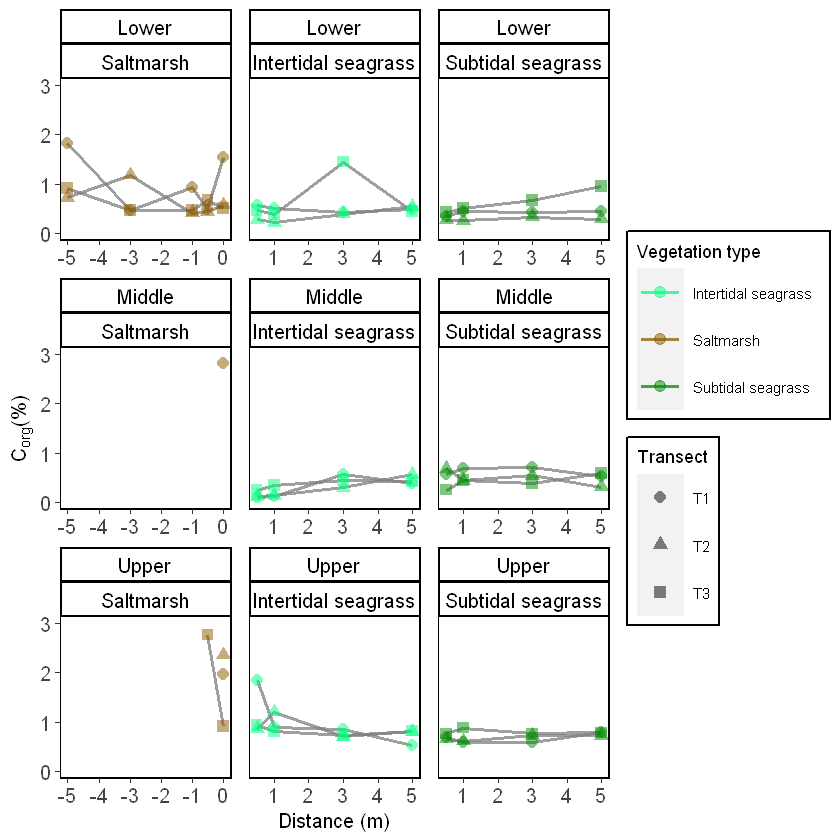

In [18]:
#changing the axis to zoom into seagrass
#just to see and 
ggplot(data = CHNS_Dataset, aes(x = Distance, y = C_percent, shape = Transect, colour  = Veg, group = Transect),) + 
    geom_line(aes(color=Transect), alpha = 0.75, linewidth = 1) +
    geom_point(size = 3,  alpha = 0.5) +
    labs(y = expression(paste(C[org],"(%)")), x  = "Distance (m)") +
    scale_colour_manual(values = Veg_cols, labels = veg_labels, , name = "Vegetation type") +
    theme(panel.grid.minor = element_blank(),
              legend.key.size = unit(1,'cm'),
              panel.background = element_blank(),
              strip.background = element_rect(colour = "black", fill=NA, size=1),
              strip.text = element_text(size = 12, colour = "black"),
              axis.text = element_text(size = 12, colour = "#434343"),
              axis.title = element_text(size = 12,colour = "black"),
              panel.spacing.x = unit(0.75, "lines"),
              legend.text = element_text(colour = "black"),
              legend.title = element_text(colour = "black"),
              legend.background  = element_rect(colour = "black", fill=NA, size = 0.75),
              panel.border = element_rect(colour = "black", fill=NA, linewidth = 0.75)) +
    facet_wrap(~Site + Veg, scales = "free_x", labeller = as_labeller(legend_labels)) + ylim(limit = c(0, 3))
    #save plot to file
    ggsave("transect_plot_SG.pdf", width = 8, height = 6)

In [10]:
#Since the data is not normal we use a spearman correlation
#can just put report the table or generate a plot
CHNS_Dataset %>%
dplyr::group_by(Veg, Site) %>%
rstatix::cor_test(Distance, C_percent, method = "spearman")

Veg,Site,var1,var2,cor,statistic,p,method
<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
Saltmarsh,Lower,Distance,C_percent,-0.200,670.37673,4.81e-01,Spearman
Saltmarsh,Middle,Distance,C_percent,-0.200,673.13793,4.70e-01,Spearman
Saltmarsh,Upper,Distance,C_percent,-0.940,1085.46868,2.31e-07,Spearman
IntertidalSeagrass,Lower,Distance,C_percent,0.220,224.24781,5.00e-01,Spearman
IntertidalSeagrass,Middle,Distance,C_percent,0.790,60.20941,2.26e-03,Spearman
IntertidalSeagrass,Upper,Distance,C_percent,-0.740,496.32548,6.42e-03,Spearman
SubtidalSeagrass,Lower,Distance,C_percent,0.350,187.19649,2.71e-01,Spearman
SubtidalSeagrass,Middle,Distance,C_percent,-0.065,304.55813,8.41e-01,Spearman
SubtidalSeagrass,Upper,Distance,C_percent,0.340,189.77811,2.85e-01,Spearman


In [11]:
CHNS_Dataset %>%
dplyr::group_by(Veg, Site) %>%
#convert distance to a factor to allow for comparisons across transects
convert_as_factor(Distance) %>%
#a formula of the form a ~ b | c, where a (numeric) is the dependent variable name; b is the within-subjects factor variables; and c (factor) is the column name containing individuals/subjects identifier. Should be unique per individual.
friedman_test(C_percent ~  Distance|Transect )

,Veg,Site,.y.,n,statistic,df,p,method
,<fct>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,Saltmarsh,Lower,C_percent,3,5.627119,4,0.22877956,Friedman test
2,Saltmarsh,Middle,C_percent,3,7.466667,4,0.11318817,Friedman test
3,Saltmarsh,Upper,C_percent,3,11.466667,4,0.02179090,Friedman test
4,IntertidalSeagrass,Lower,C_percent,3,1.800000,3,0.61493494,Friedman test
5,IntertidalSeagrass,Middle,C_percent,3,8.200000,3,0.04205418,Friedman test
6,IntertidalSeagrass,Upper,C_percent,3,5.800000,3,0.12175662,Friedman test
7,SubtidalSeagrass,Lower,C_percent,3,5.800000,3,0.12175662,Friedman test
8,SubtidalSeagrass,Middle,C_percent,3,1.000000,3,0.80125196,Friedman test
9,SubtidalSeagrass,Upper,C_percent,3,2.678571,3,0.44388115,Friedman test


In [12]:
sub_setx <- CHNS_Dataset %>%
            convert_as_factor(Distance,Transect) %>%
            dplyr::filter(Veg == "Saltmarsh" & Site == "Upper") %>%
            dplyr::select(C_percent, Distance, Transect) %>%
            as.matrix()

In [13]:
(fd_test <- friedman.test(C_percent ~  Distance|Transect, data = as.matrix(sub_setx)))


	Friedman rank sum test

data:  C_percent and Distance and Transect
Friedman chi-squared = 11.467, df = 4, p-value = 0.02179


In [14]:
#remove the distance to check if there significant differences
CHNS_Dataset %>%
dplyr::group_by(Veg, Site) %>%
kruskal_test(C_percent ~ Transect )

,Veg,Site,.y.,n,statistic,df,p,method
,<fct>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>
1,Saltmarsh,Lower,C_percent,15,1.8330935,2,0.4000,Kruskal-Wallis
2,Saltmarsh,Middle,C_percent,15,0.6661896,2,0.7170,Kruskal-Wallis
3,Saltmarsh,Upper,C_percent,15,0.1400000,2,0.9320,Kruskal-Wallis
4,IntertidalSeagrass,Lower,C_percent,12,2.5769231,2,0.2760,Kruskal-Wallis
5,IntertidalSeagrass,Middle,C_percent,12,0.7236842,2,0.6960,Kruskal-Wallis
6,IntertidalSeagrass,Upper,C_percent,12,0.3570175,2,0.8370,Kruskal-Wallis
7,SubtidalSeagrass,Lower,C_percent,12,8.7692308,2,0.0125,Kruskal-Wallis
8,SubtidalSeagrass,Middle,C_percent,12,3.3675439,2,0.1860,Kruskal-Wallis
9,SubtidalSeagrass,Upper,C_percent,12,5.3348057,2,0.0694,Kruskal-Wallis
